# Métricas de Classificação

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" />

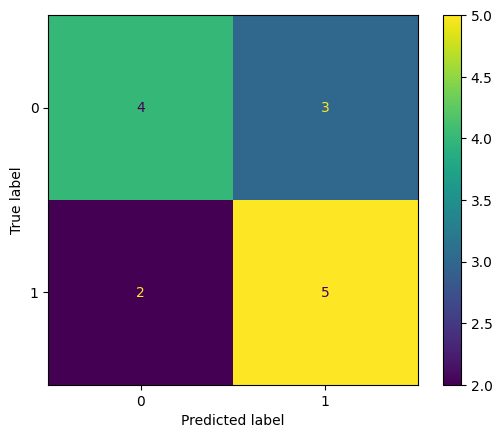

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
y_pred = [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0]

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(cm)
g = disp.plot()

<img src="https://miro.medium.com/max/1400/1*UVP_xb4F6J-M-xH3haz5Jw.png" />

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print('Acurácia=',accuracy_score(y_true, y_pred))
print('Recuperação=',recall_score(y_true, y_pred))
print('Precisão=',precision_score(y_true, y_pred))
print('Métrica F=',f1_score(y_true, y_pred))

Acurácia= 0.6428571428571429
Recuperação= 0.7142857142857143
Precisão= 0.625
Métrica F= 0.6666666666666666


In [ ]:
print('Recuperação=',recall_score(y_true, y_pred, average=None))
print('Precisão=',precision_score(y_true, y_pred, average=None))
print('Métrica F=',f1_score(y_true, y_pred, average=None))

Recuperação= [0.57142857 0.71428571]
Precisão= [0.66666667 0.625     ]
Métrica F= [0.61538462 0.66666667]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.62      0.71      0.67         7

    accuracy                           0.64        14
   macro avg       0.65      0.64      0.64        14
weighted avg       0.65      0.64      0.64        14



## Multiclasses

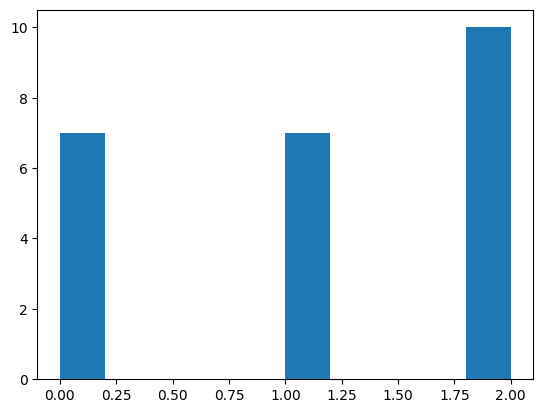

In [ ]:
y_true = [0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,2,2,2]
y_pred = [0,1,1,2,1,1,0,1,2,0,0,2,0,1,1,0,1,2,0,1,2,0,1,2]

g = plt.hist(y_true)

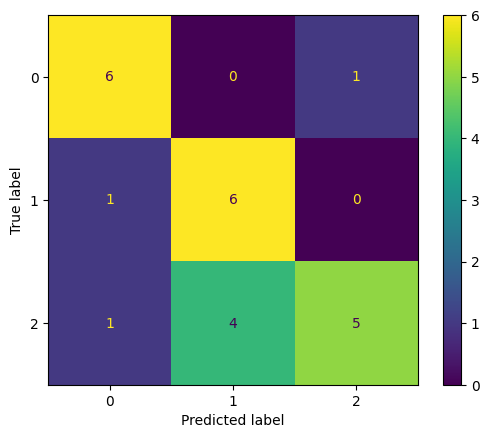

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm)
g = disp.plot()

https://scikit-learn.org/stable/modules/model_evaluation.html#from-binary-to-multiclass-and-multilabel

- "**macro**" simplesmente calcula a média das métricas binárias, dando peso igual a cada classe. Em problemas em que classes infreqüentes são importantes, a média macro pode ser um meio de destacar seu desempenho. Por outro lado, a suposição de que todas as classes são igualmente importantes geralmente não é verdadeira, de modo que a média macro enfatizará demais o desempenho normalmente baixo em uma classe pouco frequente.

- "**weighted**" contabiliza o desequilíbrio de classe calculando a média de métricas binárias em que a pontuação de cada classe é ponderada por sua presença na amostra de dados reais.

- "**micro**" dá a cada par de classe de amostra uma contribuição igual para a métrica geral (exceto como resultado do peso da amostra). Em vez de somar a métrica por classe, isso soma os dividendos e divisores que compõem as métricas por classe para calcular um quociente geral. A micromédia pode ser preferida em configurações multirrótulo, incluindo classificação multiclasse onde uma classe majoritária deve ser ignorada.

- "**samples**" aplica-se apenas a problemas multirrótulo. Ele não calcula uma medida por classe, em vez disso, calcula a métrica sobre as classes verdadeiras e preditas para cada amostra nos dados de avaliação e retorna sua sample_weightmédia (ponderada).

In [ ]:
import pandas as pd
print('Acurácia=',accuracy_score(y_true, y_pred))
averages = ['macro','weighted','micro',None]
dados=[]
for a in averages:
  dados.append({
      'a':a,
      'r':recall_score(y_true, y_pred, average=a),
      'p':precision_score(y_true, y_pred, average=a),
      'f':f1_score(y_true, y_pred, average=a),
      })
pd.DataFrame(dados)

Acurácia= 0.7083333333333334


,a,r,p,f
0,macro,0.738095,0.727778,0.710294
1,weighted,0.708333,0.740972,0.699632
2,micro,0.708333,0.708333,0.708333
3,None,"[0.8571428571428571, 0.8571428571428571, 0.5]","[0.75, 0.6, 0.8333333333333334]","[0.7999999999999999, 0.7058823529411764, 0.625]"


# Avaliação de Aprendizados Classificadores

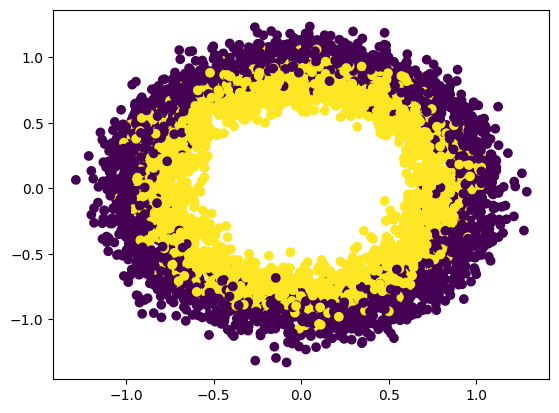

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=5000, random_state=42, noise=0.1)
g = plt.scatter(x=X[:,0], y=X[:,1], c=y)

In [ ]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB, MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

tecnicas = [
  RidgeClassifier(random_state=42),
  LogisticRegression(random_state=42),
  DummyClassifier(random_state=42),
  LinearDiscriminantAnalysis(),
  QuadraticDiscriminantAnalysis(),
  AdaBoostClassifier(random_state=42),
  BaggingClassifier(random_state=42),
  ExtraTreesClassifier(random_state=42),
  GradientBoostingClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  HistGradientBoostingClassifier(random_state=42),
  GaussianProcessClassifier(random_state=42),
  BernoulliNB(),
  CategoricalNB(),
  ComplementNB(),
  MultinomialNB(),
  GaussianNB(),
  KNeighborsClassifier(),
  RadiusNeighborsClassifier(),
  NearestCentroid(),
  MLPClassifier(random_state=42),
  LinearSVC(),
  NuSVC(),
  SVC(),
  DecisionTreeClassifier(random_state=42, max_depth=5),
  ExtraTreeClassifier(random_state=42, max_depth=15),
]

metricas = ['accuracy','precision','recall','f1']

r=[]
for t in tecnicas:
  cv = GridSearchCV(t,{},cv=4,scoring=metricas,refit=False)
  dn = {'nome':t.__class__.__name__}
  try:
    cv.fit(X,y)
    dn['fitTime'] = cv.cv_results_['std_fit_time'][0]
    for m in metricas:
      dn[m] = cv.cv_results_['mean_test_' + m][0]
  except Exception as e:
    dn['erro']=str(e)
  r.append(dn)

df_res = pd.DataFrame(r)
df_res

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined a

,nome,fitTime,accuracy,precision,recall,f1,erro
0,RidgeClassifier,0.009612,0.4892,0.488919,0.4940,0.491208,NaN
1,LogisticRegression,0.002152,0.4892,0.488919,0.4940,0.491208,NaN
2,DummyClassifier,0.000013,0.5000,0.000000,0.0000,0.000000,NaN
3,LinearDiscriminantAnalysis,0.003734,0.4892,0.488919,0.4940,0.491208,NaN
4,QuadraticDiscriminantAnalysis,0.006205,0.8308,0.839228,0.8184,0.828628,NaN
5,AdaBoostClassifier,0.013080,0.8314,0.827227,0.8388,0.832732,NaN
6,BaggingClassifier,0.005005,0.8110,0.823308,0.7924,0.807195,NaN
7,ExtraTreesClassifier,0.101547,0.8076,0.808363,0.8064,0.807299,NaN
8,GradientBoostingClassifier,0.299426,0.8324,0.817564,0.8560,0.836293,NaN
9,RandomForestClassifier,0.128798,0.8194,0.825397,0.8104,0.817727,NaN


In [ ]:
df_res.sort_values('f1',ascending=False)

,nome,fitTime,accuracy,precision,recall,f1,erro
20,MLPClassifier,0.448551,0.8422,0.849409,0.8320,0.840522,NaN
11,GaussianProcessClassifier,0.305432,0.8404,0.840950,0.8396,0.840203,NaN
23,SVC,0.004428,0.8412,0.848739,0.8304,0.839403,NaN
22,NuSVC,0.013085,0.8402,0.850710,0.8252,0.837696,NaN
8,GradientBoostingClassifier,0.299426,0.8324,0.817564,0.8560,0.836293,NaN
10,HistGradientBoostingClassifier,2.124225,0.8336,0.831868,0.8364,0.834044,NaN
5,AdaBoostClassifier,0.013080,0.8314,0.827227,0.8388,0.832732,NaN
16,GaussianNB,0.000024,0.8344,0.843313,0.8216,0.832249,NaN
4,QuadraticDiscriminantAnalysis,0.006205,0.8308,0.839228,0.8184,0.828628,NaN
17,KNeighborsClassifier,0.000187,0.8208,0.819497,0.8228,0.821132,NaN


# Ajuste de Parâmetros por Pesquisa Exaustiva

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.svm import NuSVC

# nu=0.5, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False,
#tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr',
#break_ties=False, random_state=None)
ajustes = {
    'nu':[0.1,0.5,0.9],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'tol':[0.00001,0.0001,0.001],
}
gs = GridSearchCV(NuSVC(),ajustes,cv=3,n_jobs=-1)
gs.fit(X,y)

GridSearchCV(cv=3, estimator=NuSVC(), n_jobs=-1,
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'nu': [0.1, 0.5, 0.9], 'tol': [1e-05, 0.0001, 0.001]})

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')[['params','mean_test_score','rank_test_score']].head()

,params,mean_test_score,rank_test_score
23,"{'kernel': 'rbf', 'nu': 0.5, 'tol': 0.001}",0.840601,1
22,"{'kernel': 'rbf', 'nu': 0.5, 'tol': 0.0001}",0.840601,1
21,"{'kernel': 'rbf', 'nu': 0.5, 'tol': 1e-05}",0.840601,1
26,"{'kernel': 'rbf', 'nu': 0.9, 'tol': 0.001}",0.836801,4
25,"{'kernel': 'rbf', 'nu': 0.9, 'tol': 0.0001}",0.836801,4


In [ ]:
from sklearn.svm import NuSVC

# nu=0.5, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False,
#tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr',
#break_ties=False, random_state=None)
ajustes = {
    'nu':[0.1,0.5,0.9],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'tol':[0.0001,0.001],
}

metricas = ['accuracy','precision','recall','f1']
gs = GridSearchCV(NuSVC(),ajustes,cv=3,n_jobs=-1,scoring=metricas,refit='f1')
gs.fit(X,y)

df = pd.DataFrame(gs.cv_results_)
df.sort_values(df.columns[-1])[['params',df.columns[-3],df.columns[-1]]].head()

,params,mean_test_f1,rank_test_f1
15,"{'kernel': 'rbf', 'nu': 0.5, 'tol': 0.001}",0.838432,1
14,"{'kernel': 'rbf', 'nu': 0.5, 'tol': 0.0001}",0.838432,1
17,"{'kernel': 'rbf', 'nu': 0.9, 'tol': 0.001}",0.827501,3
16,"{'kernel': 'rbf', 'nu': 0.9, 'tol': 0.0001}",0.827501,3
7,"{'kernel': 'poly', 'nu': 0.1, 'tol': 0.001}",0.636759,5


In [ ]:
df.sort_values(df.columns[-1]).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_nu,param_tol,params,split0_test_accuracy,split1_test_accuracy,...,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1
15,0.589182,0.003330,0.282208,0.005766,rbf,0.5,0.001,"{'kernel': 'rbf', 'nu': 0.5, 'tol': 0.001}",0.829634,0.848830,...,0.830732,0.827593,0.014945,1,0.825767,0.848193,0.841337,0.838432,0.009383,1
14,0.598532,0.021297,0.275388,0.008695,rbf,0.5,0.0001,"{'kernel': 'rbf', 'nu': 0.5, 'tol': 0.0001}",0.829634,0.848830,...,0.830732,0.827593,0.014945,1,0.825767,0.848193,0.841337,0.838432,0.009383,1
17,0.642792,0.007725,0.473971,0.028494,rbf,0.9,0.001,"{'kernel': 'rbf', 'nu': 0.9, 'tol': 0.001}",0.823635,0.846431,...,0.789916,0.783195,0.014154,3,0.812261,0.838384,0.831858,0.827501,0.011101,3
16,0.651667,0.009159,0.491335,0.004104,rbf,0.9,0.0001,"{'kernel': 'rbf', 'nu': 0.9, 'tol': 0.0001}",0.823635,0.846431,...,0.789916,0.783195,0.014154,3,0.812261,0.838384,0.831858,0.827501,0.011101,3
7,0.055580,0.004491,0.033796,0.001475,poly,0.1,0.001,"{'kernel': 'poly', 'nu': 0.1, 'tol': 0.001}",0.542891,0.605279,...,0.644658,0.768378,0.087644,5,0.646568,0.676181,0.587527,0.636759,0.036851,5


https://scikit-learn.org/stable/model_persistence.html

In [ ]:
from joblib import dump, load

dump(gs.best_estimator_,'NuSVC.joblib')

['NuSVC.joblib']

In [ ]:
model = load('NuSVC.joblib')

model.score(X,y)

0.842

### Utilizando Pipelines

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

pp = make_pipeline(MinMaxScaler(),GaussianProcessClassifier(random_state=42))
pp

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('gaussianprocessclassifier',
                 GaussianProcessClassifier(random_state=42))])

In [ ]:
"""
from scipy.optimize import minimize
from sklearn.gaussian_process.kernels import RBF, Matern, Exponentiation, RationalQuadratic, DotProduct, WhiteKernel

def fmin_nelder_mead(obj_func, initial_theta, bounds):
    optimResult = minimize(obj_func, initial_theta,  method='Nelder-Mead', jac=False)
    theta_opt = optimResult.x0
    func_min = optimResult.fun
    return theta_opt, func_min

ajustes = {
    'minmaxscaler__clip': [True,False],
    'gaussianprocessclassifier__optimizer': ['fmin_l_bfgs_b',fmin_nelder_mead],
    'gaussianprocessclassifier__kernel':[
        1.0 * RBF(1.0),
        1.0 * RBF(2.0),
        1.0 * Matern(length_scale=1.0, nu=1.5),
        Exponentiation(RationalQuadratic(), exponent=2),
        DotProduct() + WhiteKernel(),
        ],
}
metricas = ['accuracy','precision','recall','f1']
gs = GridSearchCV(pp, ajustes, cv=3, scoring=metricas, refit=metricas[-1])
gs.fit(X,y)"""

"\nfrom scipy.optimize import minimize\nfrom sklearn.gaussian_process.kernels import RBF, Matern, Exponentiation, RationalQuadratic, DotProduct, WhiteKernel\n\ndef fmin_nelder_mead(obj_func, initial_theta, bounds):\n    optimResult = minimize(obj_func, initial_theta,  method='Nelder-Mead', jac=False)\n    theta_opt = optimResult.x0\n    func_min = optimResult.fun\n    return theta_opt, func_min\n\najustes = {\n    'minmaxscaler__clip': [True,False],\n    'gaussianprocessclassifier__optimizer': ['fmin_l_bfgs_b',fmin_nelder_mead],\n    'gaussianprocessclassifier__kernel':[\n        1.0 * RBF(1.0),\n        1.0 * RBF(2.0),\n        1.0 * Matern(length_scale=1.0, nu=1.5),\n        Exponentiation(RationalQuadratic(), exponent=2),\n        DotProduct() + WhiteKernel(),\n        ],\n}\nmetricas = ['accuracy','precision','recall','f1']\ngs = GridSearchCV(pp, ajustes, cv=3, scoring=metricas, refit=metricas[-1])\ngs.fit(X,y)"

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

#hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000
pp = make_pipeline(MinMaxScaler(),MLPClassifier(random_state=42))

ajustes={
    'minmaxscaler__clip': [True,False],
    'mlpclassifier__hidden_layer_sizes':[(100,),(50,50,),(20,20,)],
    'mlpclassifier__activation': ['relu','tanh'],
    'mlpclassifier__learning_rate': ['constant','invscaling'],
}

gs = GridSearchCV(pp,ajustes, cv=5)
gs.fit(X,y)



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('mlpclassifier',
                                        MLPClassifier(random_state=42))]),
             param_grid={'minmaxscaler__clip': [True, False],
                         'mlpclassifier__activation': ['relu', 'tanh'],
                         'mlpclassifier__hidden_layer_sizes': [(100,), (50, 50),
                                                               (20, 20)],
                         'mlpclassifier__learning_rate': ['constant',
                                                          'invscaling']})

In [ ]:
df = pd.DataFrame(gs.cv_results_)
df.sort_values('rank_test_score')[['params','mean_test_score','rank_test_score']].head()

,params,mean_test_score,rank_test_score
21,"{'minmaxscaler__clip': False, 'mlpclassifier__...",0.8410,1
20,"{'minmaxscaler__clip': False, 'mlpclassifier__...",0.8410,1
8,"{'minmaxscaler__clip': True, 'mlpclassifier__a...",0.8410,1
9,"{'minmaxscaler__clip': True, 'mlpclassifier__a...",0.8410,1
0,"{'minmaxscaler__clip': True, 'mlpclassifier__a...",0.8408,5


# Busca Aleatória de Ajustes

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

'''
n_estimators: int = 100, *, criterion: str = "gini",
max_depth: Any | None = None, min_samples_split: int = 2,
min_samples_leaf: int = 1, min_weight_fraction_leaf: float = 0,
max_features: str = "sqrt", max_leaf_nodes: Any | None = None,
min_impurity_decrease: float = 0, bootstrap: bool = True,
oob_score: bool = False, n_jobs: Any | None = None,
random_state: Any | None = None, verbose: int = 0,
warm_start: bool = False, class_weight: Any | None = None,
ccp_alpha: float = 0, max_samples: Any | None = None
'''
clf = RandomForestClassifier(random_state=42)

ajustes = {
    'n_estimators': sp_randInt(50,200),
    'max_depth': sp_randInt(3,15),
    #'min_impurity_decrease': sp_randFloat(0.,10.),
}

rs = RandomizedSearchCV(clf,ajustes,cv=3,random_state=42)
rs.fit(X,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f16d5a90dc0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f16d51154f0>},
                   random_state=42)

# Atividade

Realize os procedimentos acima com as bases de dados apresentadas abaixo:

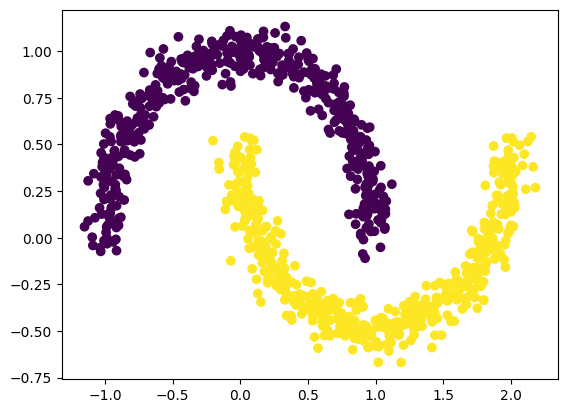

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.07, random_state=42)

g = plt.scatter(x=X[:,0], y=X[:,1], c=y)

In [ ]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB, MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

tecnicas = [
  RidgeClassifier(random_state=42),
  LogisticRegression(random_state=42),
  DummyClassifier(random_state=42),
  LinearDiscriminantAnalysis(),
  QuadraticDiscriminantAnalysis(),
  AdaBoostClassifier(random_state=42),
  BaggingClassifier(random_state=42),
  ExtraTreesClassifier(random_state=42),
  GradientBoostingClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  HistGradientBoostingClassifier(random_state=42),
  GaussianProcessClassifier(random_state=42),
  BernoulliNB(),
  CategoricalNB(),
  ComplementNB(),
  MultinomialNB(),
  GaussianNB(),
  KNeighborsClassifier(),
  RadiusNeighborsClassifier(),
  NearestCentroid(),
  MLPClassifier(random_state=42),
  LinearSVC(),
  NuSVC(),
  SVC(),
  DecisionTreeClassifier(random_state=42, max_depth=5),
  ExtraTreeClassifier(random_state=42, max_depth=15),
]

metricas = ['accuracy','precision','recall','f1']

r=[]
for t in tecnicas:
  cv = GridSearchCV(t,{},cv=4,scoring=metricas,refit=False)
  dn = {'nome':t.__class__.__name__}
  try:
    cv.fit(X,y)
    dn['fitTime'] = cv.cv_results_['std_fit_time'][0]
    for m in metricas:
      dn[m] = cv.cv_results_['mean_test_' + m][0]
  except Exception as e:
    dn['erro']=str(e)
  r.append(dn)

df_res = pd.DataFrame(r)
df_res

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined a

,nome,fitTime,accuracy,precision,recall,f1,erro
0,RidgeClassifier,0.002411,0.882,0.882170,0.882,0.881488,NaN
1,LogisticRegression,0.000647,0.886,0.885989,0.886,0.885395,NaN
2,DummyClassifier,0.000048,0.500,0.000000,0.000,0.000000,NaN
3,LinearDiscriminantAnalysis,0.000210,0.882,0.882170,0.882,0.881488,NaN
4,QuadraticDiscriminantAnalysis,0.000628,0.880,0.880136,0.880,0.879433,NaN
5,AdaBoostClassifier,0.004770,0.994,0.992156,0.996,0.994032,NaN
6,BaggingClassifier,0.000536,0.994,0.994079,0.994,0.994000,NaN
7,ExtraTreesClassifier,0.004704,1.000,1.000000,1.000,1.000000,NaN
8,GradientBoostingClassifier,0.008379,0.998,0.996032,1.000,0.998008,NaN
9,RandomForestClassifier,0.003640,0.996,0.996063,0.996,0.996008,NaN


In [ ]:
df_res.sort_values('f1',ascending=False)

,nome,fitTime,accuracy,precision,recall,f1,erro
23,SVC,0.001553,1.000,1.000000,1.000,1.000000,NaN
17,KNeighborsClassifier,0.000174,1.000,1.000000,1.000,1.000000,NaN
7,ExtraTreesClassifier,0.004704,1.000,1.000000,1.000,1.000000,NaN
8,GradientBoostingClassifier,0.008379,0.998,0.996032,1.000,0.998008,NaN
25,ExtraTreeClassifier,0.000130,0.998,1.000000,0.996,0.997992,NaN
10,HistGradientBoostingClassifier,0.013586,0.996,0.994079,0.998,0.996016,NaN
9,RandomForestClassifier,0.003640,0.996,0.996063,0.996,0.996008,NaN
5,AdaBoostClassifier,0.004770,0.994,0.992156,0.996,0.994032,NaN
6,BaggingClassifier,0.000536,0.994,0.994079,0.994,0.994000,NaN
24,DecisionTreeClassifier,0.000045,0.986,0.986047,0.986,0.986000,NaN


##NLP


https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [ ]:
from sklearn.datasets import fetch_20newsgroups

newsData = fetch_20newsgroups()
X = newsData.data
y = newsData.target

print(newsData.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

cv = CountVectorizer()
Xcv = cv.fit_transform(X)
Xcv[0]

<1x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 89 stored elements in Compressed Sparse Row format>

In [ ]:
tv = TfidfVectorizer()
Xtv = tv.fit_transform(X)
Xtv[0]

<1x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 89 stored elements in Compressed Sparse Row format>

In [ ]:
tt = TfidfTransformer()
Xtt = tt.fit_transform(Xcv)
Xtt[0]

<1x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 89 stored elements in Compressed Sparse Row format>

In [ ]:
clf = BernoulliNB()
clf.fit(Xtt,y)
clf.score(Xtt,y)

0.7821283365741559

In [ ]:
ppt = make_pipeline(CountVectorizer(),TfidfTransformer(),BernoulliNB())
ppt.fit(X,y)
ppt.score(X,y)

0.7821283365741559

In [ ]:
print(X[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [ ]:
newsData.target_names[y[0]]

'rec.autos'

In [ ]:
y_pred = ppt.predict(['''From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----'''])
newsData.target_names[y_pred[0]]

'rec.autos'

In [ ]:
print(X[1])

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



In [ ]:
newsData.target_names[y[1]]

'comp.sys.mac.hardware'

In [ ]:
y_pred = ppt.predict(['''From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>'''])
newsData.target_names[y_pred[0]]

'comp.sys.mac.hardware'